# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.

import pandas as pd
import matplotlib.pyplot as plt

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

student_data.index.name="Student ID"

student_data

,Age,Tardies
Student ID,,
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0


Draw a dispersion diagram (scatter plot) for the data.

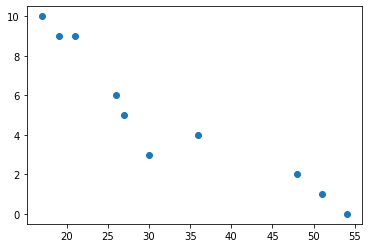

In [2]:
# Your code here.

plt.scatter(student_data["Age"],student_data["Tardies"])
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 


""" The relationship is negative but not perfect """

' The relationship is negative but not perfect '

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:

print(student_data["Age"].corr(student_data["Tardies"]))


#covariance:

print(student_data["Age"].cov(student_data["Tardies"]))


-0.9391626886887122
-45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.

import sklearn.linear_model as linear

model=linear.LinearRegression()


model.fit(X=student_data[["Age"]],y=student_data[["Tardies"]])


print(model.intercept_)

print(model.coef_)

print(""" The outcome is a linear regression with a defined slope and intersection """)


[12.88880336]
[[-0.24282077]]
 The outcome is a linear regression with a defined slope and intersection 


Plot your regression model on your scatter plot.

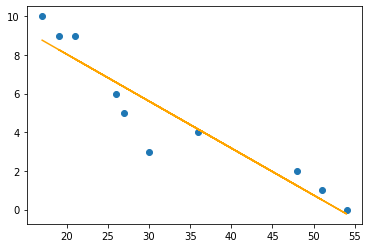

In [6]:
# Your code here.



y_hat=model.predict(student_data[["Age"]])

plt.plot(student_data[["Age"]],y_hat,c="orange")
plt.scatter(student_data["Age"],student_data["Tardies"])
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
# Your response here. 

print(model.score(X=student_data[["Age"]],y=student_data[["Tardies"]]))


print("""  The score of the model is pretty high, around 90%. We can have a high confidence over the model 

Age is a good predictor of tardiness, the both variables are extremely correlated

""")

0.8820265558250109
  The score of the model is pretty high, around 90%. We can have a high confidence over the model 

Age is a good predictor of tardiness, the both variables are extremely correlated




## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [33]:
# Import any libraries you may need & the data

import sklearn.linear_model as linear

model=linear.LinearRegression()

vehicles=pd.read_csv("vehicles.csv")


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
# Your response here. 

model_inputs=vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]

model_output=vehicles[["CO2 Emission Grams/Mile"]]

correlation_values=vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]

correlation_values.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [35]:
# Your response here. 

model.fit(X=model_inputs,y=model_output)


"""" Linear Regression """

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [38]:
# Your response here. 

model.intercept_

model.coef_

"""" Coeficients and intercept are the fundamental parameters of the linear regression model """

model.score(model_inputs,model_output)

"""" Model has a score of 0.98, almost 1 which is the maximum. So we are pretty confident in this model accuracy """



0.9808734920269122

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [93]:
# Your code here.

data=pd.DataFrame({"Invited":[1,3,4,6,8,9,11,14],"Attended":[1,2,4,4,5,7,8,13]})


In [94]:
import sklearn.linear_model as linear

model=linear.LinearRegression()

model.fit(X=data[["Invited"]],y=data[["Attended"]])


LinearRegression()

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

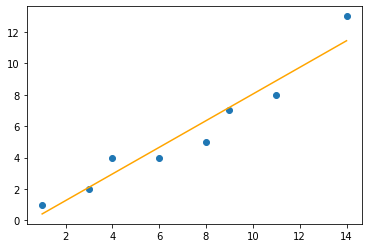

In [95]:
# Your code here.

plt.scatter(data["Invited"],data["Attended"])
plt.plot(data[["Invited"]],model.predict(data[["Invited"]]),c="orange")
plt.show()



What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [98]:
# Your response here. 

print(model.score(data[["Invited"]],data[["Attended"]]))

"""" This tells the two variables are positively correlated, in a strong way """

0.9316696375519905


'" This tells the two variables are positively correlated, in a strong way '

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

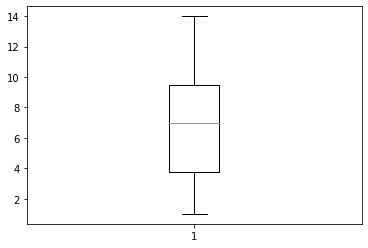

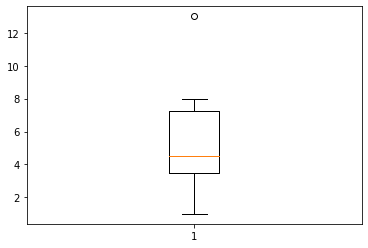

In [61]:
# Your response here. 
plt.boxplot(data["Invited"])
plt.show()

plt.boxplot(data["Attended"])
plt.show()


""""  Attended data has one potential candidate for outlier, further investigation needs to be done in order to know if it is a real oulier or not"""


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [100]:
# Your response here. 


data.drop(labels=7,axis=0,inplace=True)


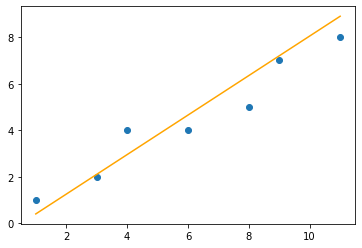

In [104]:
plt.scatter(data["Invited"],data["Attended"])
plt.plot(data[["Invited"]],model.predict(data[["Invited"]]),c="orange")
plt.show()

In [106]:
model.score(data[["Invited"]],data[["Attended"]])

0.8797748490413779

In [ ]:
"""  Model score decreased, i.e., model is less fitted to the data """